# 相位估计

## 0 背景

  相位估计是许多量子算法的关键，例如著名的 Shor 算法和量子变分算法 (VQA) 等。相位估计的作用主要是实现对任意酉算符 $U$ 的本征值相位进行计算，给出相位估计的近似解。作为量子计算的一个典型子算法，相位估计可以和其他算法结合共同执行一些有趣的计算任务。

## 1 相位估计

  假设我们有一个任意的酉算符 $U$，它有一个本征态 $\left|u\right \rangle$，相应的本征值为 $e^{2\pi i \theta}$ ，$\theta$ 是未知的，需要我们用一个算法去估计。相位估计算法就是为实现这一目的而诞生的，下面我们用 $\theta$ 表示实际相位， $\theta^{'}$ 表示我们估计得到的相位。

### 1.1 量子傅里叶变换(QFT)

 在相位估计算法中，我们需要用到量子傅里叶变换(QFT)及其逆变换(IQFT)，在此我们给出量子傅里叶变换的公式：
 $$
 QFT\left|j\right\rangle=\frac{(\left|0\right\rangle+e^{2\pi i0.j_{n}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i0.j_{n-1}j_{n}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i0.j_{1}…j_{n}}\left|1\right\rangle)}{2^{n/2}}
 $$
  因为 QFT 的幺正性，构造 IQFT 的电路是十分容易的，我们只需要将 QFT 的电路中的每个 $U$ 门替换为其对应的伴随算子 $U^{\dagger}$ 门即可。

### 1.2 相位估计的过程

  相位估计需要用到两个寄存器。

  第一个寄存器包含 t 个量子位元，称为辅助比特，初始状态为 $\left|0\right\rangle$ ，如何选择 t 取决于两件事：第一点是希望估计拥有的精度位数，第二点是相位估计成功的概率。从下面的分析我们可以自然地得出 t 是怎么被决定的。

  第二个寄存器从状态 $\left|u\right\rangle$ 开始，其中 $\left|u\right\rangle$ 是 $U$ 算符的特征向量。包含所必需的存储 $\left|u\right\rangle$ 所用的量子位元。

  相位估计的电路图如下图所示：
  ![1](.\phase_estimation.png#pic_center)
  我们首先对第一个寄存器的所有比特应用 H 门，然后对第二个寄存器应用控制 $U$ 门，以第一个寄存器中的每个比特作为控制比特，分别应用控制 $U$ 门的 $2^0,2^1,……,2^{t-1}$ 次幂。得到如上图所示的纠缠态，再对第一个寄存器应用逆量子傅里叶变换(IQFT),最后进行测量即完成一整个相位估计的过程。

  下图给出了简易版的相位估计示意图：
  ![2](.\phase-estimation-1.png#pic_center)

### 1.3 数学推导

  下面我们给出相位估计的数学推导过程。已知的前提条件有 $U\left|u\right\rangle=e^{2\pi i\theta}\left|u\right\rangle$ : 其中 $\theta$ 为相位
  **1.初态**: 系统初始位于 $\left|\underbrace{00\dots0}_t\right\rangle\otimes\left|u\right\rangle$ 态

  **2.混合**: 对所有辅助位元应用 H 门，混合成一个均匀的叠加态 $\frac{1}{\sqrt{2^t}}(\left|00\dots0\right\rangle+\dots+\left|11\dots1\right\rangle)$ ，整体变成 $\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}\left|j\right\rangle\otimes\left|u\right\rangle)$
  **3.受控U门**: 受控 U 门的逻辑是:当第一个寄存器的辅助比特为 $\left|0\right\rangle$ 时，不执行任何操作。当第一个寄存器的辅助比特为 $\left|1\right\rangle$ 时，对第二个寄存器中的态施加 $2^j$ 次个 U 门(j与辅助比特的序号有关)。如此对整体施加若干次幂个 U 门后，系统整体的态为：
  $$
\begin{equation}
\begin{aligned}
系统状态&=\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}\left|j\right\rangle\otimes \sum_{j=0}^{2^t-1}U^{2^j}\left|u\right\rangle) \\
&=\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}e^{2\pi i\theta \cdot 2^j}\left|j\right\rangle)\otimes \left|u\right\rangle \\
&=\frac{(\left|0\right\rangle+e^{2\pi i\theta \cdot2^{t-1}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i\theta \cdot2^{t-2}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i\theta \cdot2^{0}}\left|1\right\rangle)}{2^{t/2}} \otimes \left|u\right\rangle \\
&=\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}e^{2\pi i\cdot \theta_j}\left|j\right\rangle)\otimes \left|u\right\rangle
\end{aligned}
\end{equation}
  $$
  其中 $\theta_j$ 是 $\theta$ 的二进制小数表示的每一位， $\theta=0.\theta_1 \theta_2 \dots \theta_{t}$ ，从上述推导公式(2)中的第三行不难看出第一个寄存器中的状态就是对 $\theta$ 实施量子傅里叶变换的结果。
  **4.测量**: 此时对第一个寄存器进行测量，得到 $\theta^{'}$ ,如果 $\theta$ 的小数位数小于等于 t ，那么这就是 $\theta$ 的精确解。如果 $\theta$ 的小数位数大于 t ，那么得到的 $\theta^{'}$ 是 $\theta$ 的一个近似解，近似精度到 t 位。

**补充说明**: 如果想要以至少 $1-\epsilon $ 的概率得到 $\theta$ 精确到 n 位的估计，需要t满足：
$$
t=n+[\log_{2}{(2+\frac{1}{2\epsilon})}]   （[x]表示x向上取整）
$$
详细证明可以参考 A.Nielsen & L.Chuang 的 《Quantum computation and Quantum information》第五章。

### 1.4 本征态制备

  在上述过程中，我们按照 $\left|u\right\rangle$ 是 $U$ 的一个本征态来处理，假如我们不知道 $U$ 的本征态，将其所有本征态记作 $\left|\psi_{n}\right\rangle$ , $n=1,2,3,\dots$ 对应本征值为 $e^{2\pi i\theta_{n}$ 。将 $\left|u\right\rangle$ 按照本征值展开 $\left|u\right\rangle={\textstyle \sum_{n}^{}}c_{n}\left|\psi_{n}\right\rangle$ 。因此相位估计的结果变为 ${\textstyle \sum_{n}^{}}c_{n}\left|\theta_{n}^{'}\right\rangle \otimes \left|\psi_{n}\right\rangle$ 态，测量第一个寄存器得到的结果是一个概率分布，我们以 $\left| c_{n}^{2}\right|$ 的概率得到 $\left|\theta_{n}^{'}\right\rangle$ ，这是一个 $\theta_{n}$ 的近似解。因此我们无需特意制备 $U$ 的本征态就能完成相位估计的过程。

### 1.5 算法流程

 **输入**: 1.一个产生受控 U 门的 j 次幂黑盒($j=0,1,2\dots t$)

 2. $U$ 的一个本征值为 $e^{2\pi i\theta_{u}$ 的本征态 $\left|u\right\rangle$

 3. $t=n+[\log_{2}{(2+\frac{1}{2\epsilon})}]   （[x]表示x向上取整）$ 个处于 $\left|0\right\rangle$ 初始态的量子比特

 **输出**: $\theta_{u}$的 n 比特估计 $\theta_{u}^{'}$

 **运行时间**: $O(t^2)$ 的时间复杂度和每个黑盒各调用一次

 **成功概率**: 至少为 $1-\epsilon$

 **流程**: 1. $\left|0\right\rangle\otimes\left|u\right\rangle$ 初始态

 2. $\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}\left|j\right\rangle\otimes\left|u\right\rangle)$ 均匀混合态

 3. $\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}e^{2\pi i\cdot \theta_j}\left|j\right\rangle)\otimes \left|u\right\rangle$ 通过黑盒后的结果

 4. $\left|\theta_{n}^{'}\right\rangle \otimes \left|\psi_{n}\right\rangle$ 逆QFT后的态

 5. $\left|\theta_{n}^{'}\right\rangle$ 测量第一个寄存器的结果

## 2 pyquafu中实现相位估计算法

### 2.1 T门的估计

 下面我们使用相位估计算法来估计 T 算符，T 门的矩阵表示为： $T=\begin{bmatrix}
 1 & 0\\
 0 & e^{\frac{i\pi}{4} }
\end{bmatrix}$ ，因此有 $T\left|0\right\rangle=\left|0\right\rangle , T\left|1\right\rangle=e^{2\pi i \theta}\left|1\right\rangle$ ,其中 $\theta=\pi /8$ 。接下来我们用三个量子比特进行 T 门相位的估计。

In [90]:
#导入所需的包
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt

def iqft(qc,n): #逆量子傅里叶变换，只需要将量子傅里叶变换中的门改为相应的酉门,然后颠倒次序即可
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1) #先交换
    for i in range(n):
        for k in range(i):
            qc.cp(n-k-1,n-1-i,-np.pi*(2**(k-i))) #反过来添加H门和cp门
        qc.h(n-i-1)
    return qc

def mix(qc,n):
    for qubit in range(n):
        qc.h(qubit)##将第一个寄存器混合均匀
    return qc

def repeat_ct(qc,n,cbit):
    repetitions=1
    for help_qubit in range(n):
        for i in range(repetitions):
            qc.ct(help_qubit,cbit)  # 这是受控的T门,第一个参数是控制比特，第二个是目标比特
        repetitions *= 2 # 幂次逐渐升高
    return qc

qpe = QuantumCircuit(4)
qpe.x(3) ##将第二个寄存器内的比特制备成|1>态
mix(qpe,3)
repeat_ct(qpe,3,3)
qpe.barrier([0,1,2,3])
qpe.swap(0,2)
iqft(qpe,3)
qpe.barrier([0,1,2,3])
qpe.measure([0,1,2])
qpe.draw_circuit(width=2)

q[0]  -H--*--------------------||-x--x-------------------P(-0.785)--P(-1.571)--H--|| M->c[0]
          |                    || |  |                       |          |         ||
q[1]  -H--|--*--*--------------||-|--|-----P(-1.571)--H------|----------*---------|| M->c[1]
          |  |  |              || |  |         |             |                    ||
q[2]  -H--|--|--|--*--*--*--*--||-x--x--H------*-------------*--------------------|| M->c[2]
          |  |  |  |  |  |  |  ||                                                 ||
q[3]  -X--T--T--T--T--T--T--T--||-------------------------------------------------||


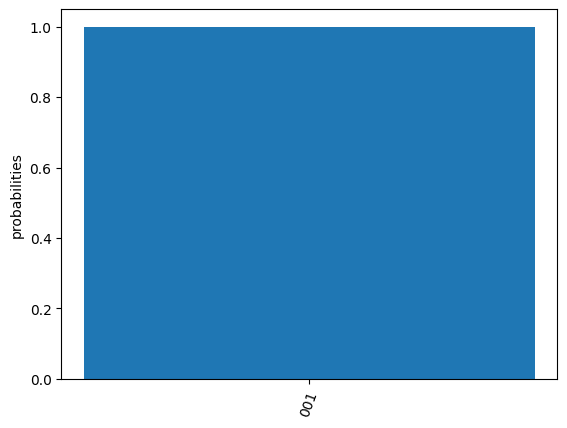

In [91]:
#模拟验证相位估计
simu_res = simulate(qpe,output='probabilities')
simu_res.plot_probabilities()
plt.show()

### 2.2 精度不够的情况(3比特模拟)

在2.1中我们考虑了 T 门的估计，实际上 T 门用3个比特恰好可以给出精确估计，但假如我们需要估计 $\theta=1/3$ 3个比特就无法给出精确解了，下面我们说明这一点：

q[0]  H-----*----------------------------------------------------------||x-x---------------P(-0.785)-P(-1.571)-H-|| M->c[0]
            |                                                          ||| |                   |         |       ||
q[1]  H-----|--------*--------*----------------------------------------|||-|---P(-1.571)-H-----|---------*-------|| M->c[1]
            |        |        |                                        ||| |       |           |                 ||
q[2]  H-----|--------|--------|--------*--------*--------*--------*----||x-x-H-----*-----------*-----------------|| M->c[2]
            |        |        |        |        |        |        |    ||                                        ||
q[3]  X--P(2.094)-P(2.094)-P(2.094)-P(2.094)-P(2.094)-P(2.094)-P(2.094)||----------------------------------------||


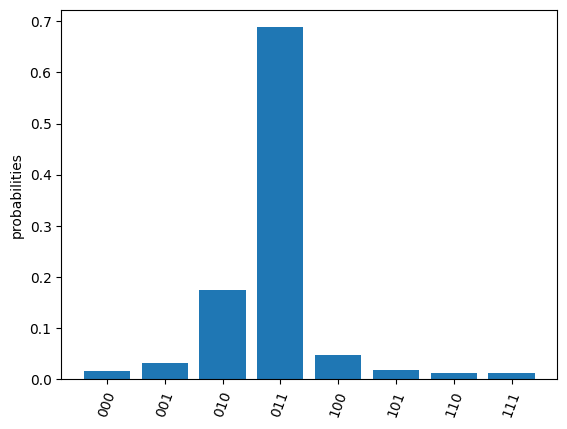

In [92]:
qpe2=QuantumCircuit(4)
qpe2.x(3)
mix(qpe2,3)
angle=2*np.pi/3
repetitions2=1
for help_qubit in range(3):
    for i in range(repetitions2):
        qpe2.cp(help_qubit,3,angle)  # 这是受控的T门,第一个参数是控制比特，第二个是目标比特
    repetitions2 *= 2 # 幂次逐渐升高
qpe2.barrier([0,1,2,3])
qpe2.swap(0,2)
iqft(qpe2,3)
qpe2.barrier([0,1,2,3])
qpe2.measure([0,1,2])
qpe2.draw_circuit(width=1)
simu_res2 = simulate(qpe2,output='probabilities')
simu_res2.plot_probabilities()
plt.show()

从结果中我们可以看出，最有可能的是 010(bin)=2(dec) 和 011(bin)=3(dec),分别对应 $\theta=2/2^{3}=0.25$ 和 $\theta=3/2^{3}=0.375$ 。真实的结果 $\theta=1/3=0.333\dots$ 介于这两者之间，因此这个估计还是比较粗糙的，想要提高精度，我们就需要增加用到的辅助比特数。

### 2.3 提高精度模拟(5比特模拟)

下面我们将辅助比特数提高至五个，并模拟结果。

q[0]  H-----*----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------||x---------------------------------------------------------------------P(-0.196)-P(-0.393)-P(-0.785)-P(-1.571)-H-|| M->c[0]
            |                                                                                                                                                                                                                                                                                  |||                                                                         |         |         |         |       ||
q[1]  H-----|--------*--------*---------------------------------------------------------------------------------------------------------------------------------------------------------

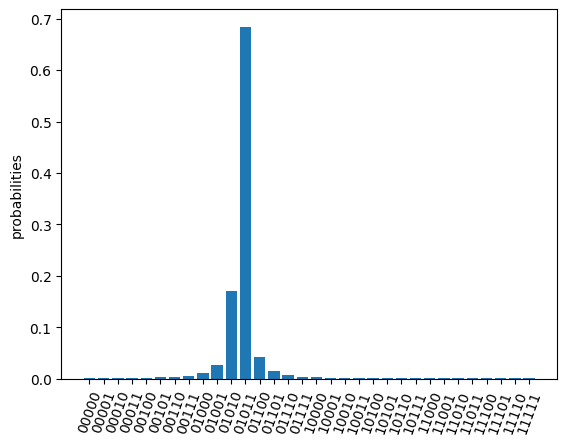

In [93]:
qpe3=QuantumCircuit(6)
qpe3.x(5)
mix(qpe3,5)
angle=2*np.pi/3
repetitions3=1
for help_qubit in range(5):
    for i in range(repetitions3):
        qpe3.cp(help_qubit,5,angle)  # 这是受控的T门,第一个参数是控制比特，第二个是目标比特
    repetitions3 *= 2 # 幂次逐渐升高
qpe3.barrier([0,1,2,3,4,5])
iqft(qpe3,5)
qpe3.barrier([0,1,2,3,4,5])
qpe3.measure([0,1,2,3,4])
qpe3.draw_circuit(width=1)
simu_res3 = simulate(qpe3,output='probabilities')
simu_res3.plot_probabilities()
plt.show()

这次最有可能的测量结果为 01011(bin)=11(dec) 和 01010(bin)=10(dec)。对应计算得到 $\theta=11/2^{5}=0.344$ 和 $\theta=10/2^{5}=0.313$ 。真实的结果 $\theta=1/3=0.333\dots$ 介于这两者之间，相对误差分别为 3% 和 6% ，估计的精度已经大大提高了。继续增加辅助比特数，我们可以将估计精度控制在任意我们需要的范围内。